# <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
## Tasca M5 T01: Exercicis d'Hipotesis Testing.
### Juan Javier Hidalgo Gómez

### <font color='#d50283'>- Generación del Entorno de trabajo</font>

<font color='#00913f'>*Descripción de las variables:*</font>   
* **Rk**: Ranking (Índice).  
* **Squad**: Equipo.     
* **Country**: País.    
* **LgRk**: Posición del equipo en la liga (ranking).  
* **MP**: Partidos jugados.   
* **W**: Partidos ganados.  
* **D**: Partidos empatados.  
* **L**: Partidos perdidos.  
* **GF**: Goles marcados.  
* **GA**: Goles en contra.  
* **GD**:  Diferencia de goles (GF-GA).  
* **pts**: Puntos.  
* **pts/ G**: Puntos / Partidos jugados.  
* **xG**: = Probabilidad goles esperados, probabilidad de que un tiro produzca un gol.  
* **xGA**: Probabilidad de gol esperado en contra, probabilidad que un tiro en contra produzca un gol.    
* **xGD**: Diferencia entre goles esperados y goles esperados en contra.    
* **xGD/90**:= Diferencia de probalidad en 90 minuts.    
* **Last 5**: Resultado de los últimos 5 partidos [W (Ganados), D (Empatados), L (Perdidos)].  
* **Attendance**: Número de personas que asisten al partido.  
* **Top Team Scorer**: Jugador más goleador + Goles.  
* **Goalkepper**: Portero.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro,pearsonr,normaltest,anderson
from colorama import init, Fore, Back, Style
#%matplotlib inline( ver las gráficas en el propio notebook)

#Variables genéricas:
path=r'C:\Users\Nitropc\IT Academy\Data Science\DS_Sprint_05\Fuente de Datos\Lligues europees UEFA.csv'

#Funciones
# Intento de Mecanizar acciones/herramientas para el analisis de cualquier DataSet
# Guardar información de los pasos EDA

def GrabarFicheros (fichero,texto):
    ocurrencias=str.split(path,"/")
    duppath = ''
    for s in ocurrencias[:-1]:duppath += s + '/' 
    try:
        file=open(f"{duppath}{fichero}","a", encoding='utf-8')
        file.write(texto+"\n") 
    except IOError:
        file=open(f"{duppath}{fichero}","w", encoding='utf-8')
        file.write(texto+"\n")
    file.close()
        
# Eliminar las filas 

def Eliminar_duplicados(dfe):
    file="Duplicados.txt"
    # Número de registros del dataSet antes de eliminar.
    treg=dfe.duplicated().sum()
    df=dfe[dfe.duplicated(keep=False)]
    texto=f"Número de duplicados={treg}"
    GrabarFicheros(file,texto)
    texto=f"Filas Duplicadas={df}"
    GrabarFicheros(file,texto)
    if treg!=0:dfs=dfe.drop_duplicates()
    else: dfs=dfe
    file=""  
    #input("Please press the Enter key to proceed")
    return(dfs)
        

def Eliminar_Nulos(dfe):
    file="Nulos.txt"
    # Número de registros del dataSet antes de eliminar.
    treg=data.isnull().any(axis=1).sum()
    df=dfe[dfe.isnull().any(axis=1)]
    texto=f"Número de Nulos={treg}"
    GrabarFicheros(file,texto)
    texto=f"Filas Nulas={df}"
    GrabarFicheros(file,texto)
    #print(f'Resultado:\n Total de Duplicados={treg}')
    # eliminamos Filas con datos nulos
    #input("Please press the Enter key to proceed")
    if treg!=0:dfs=dfe.dropna(how='all')
    else: dfs=dfe
    file=""     
    
    return(dfs)


#Cuerpo 
data = pd.read_csv(path,sep=';',encoding='ISO-8859-1')
print(Style.BRIGHT +'Análisis Exploratorio de Datos(EDA):\n\nResultado:\n '+Style.RESET_ALL)
print(f'- Total de Registros {data.shape[0]}, Total de atributos {data.shape[1]}.\n')

data=Eliminar_duplicados(data)
data=Eliminar_Nulos(data)

#print(f'Estudio Nulos:\n{data.isna().sum().sort_values(ascending = False)}')
print(f'- Total de Registros una vez eliminados duplicados y Nulos {data.shape[0]}.\n')
print(f'- Tamaño del DataSet: {data.shape} \n')
print(f'- Información del DataSet:\n')
display(data.info())
print(f'- Visualización de diferentes filas al azar:')
display(data.sample(10))
print('- Estadística descriptiva del DataSet:\n')
display(data.describe())
print('- Tabla de Coeficiente de Correlación (Correlación Negativa/Positiva alta, +/- 0.70) :\n')
#sns.pairplot(data)
#plt.show()

def color_negative_red(val):
    color = 'green' if val <= -0.70 or val >= 0.70  else 'black'
    return 'color: %s' % color
    

def text_format(val):
    color = 'salmon' if val <= -0.70 or val >= 0.70 else 'white'
    return 'background-color: %s' % color


color_negative_red(-4)

Tabla=data.corr()

Tabla.style.applymap(text_format)



Análisis Exploratorio de Datos(EDA):

Resultado:
 
- Total de Registros 98, Total de atributos 21.

- Total de Registros una vez eliminados duplicados y Nulos 98.

- Tamaño del DataSet: (98, 21) 

- Información del DataSet:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non

None

- Visualización de diferentes filas al azar:


,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
82,83,Leeds United,ENG,17,37,8,11,18,40,78,...,35,0.95,45.8,69.1,-23.4,-0.63,D L L L D,36308,Raphael Dias Belloli - 10,Illan Meslier
20,21,Betis,ESP,5,37,19,7,11,62,40,...,64,1.73,54.0,42.9,11.1,0.30,L D L W W,41749,Juanmi - 16,Rui Silva
74,75,Everton,ENG,16,36,10,6,20,39,59,...,36,1.00,40.9,50.0,-9.2,-0.25,L W W D L,38446,Richarlison - 9,Jordan Pickford
13,14,Monaco,FRA,2,37,20,8,9,63,38,...,68,1.84,56.8,39.7,17.1,0.46,W W W W W,5870,Wissam Ben Yedder - 24,Alexander Nübel
48,49,Brighton,ENG,10,37,11,15,11,39,43,...,48,1.30,44.3,45.3,-1.0,-0.03,L D W W D,30931,Leandro Trossard Neal Maupay - 8,Robert Sánchez
16,17,Atlético Madrid,ESP,3,37,20,8,9,63,42,...,68,1.84,51.0,30.9,20.1,0.56,D L W W D,48039,Ángel Correa Luis Suárez - 11,Jan Oblak
97,98,Greuther Fürth,GER,18,34,3,9,22,28,82,...,18,0.53,30.7,60.3,-29.6,-0.87,D L D L L,7672,Branimir Hrgota - 9,Sascha Burchert
19,20,Rennes,FRA,4,37,20,5,12,80,38,...,65,1.76,61.2,39.2,22.0,0.60,L W W L W,25309,Martin Terrier - 21,Alfred Gomis
27,28,Lens,FRA,7,37,17,10,10,60,46,...,61,1.65,50.5,41.2,9.3,0.25,W D D W W,28460,Arnaud Kalimuendo - 12,Jean-Louis Leca
33,34,Manchester Utd,ENG,6,37,16,10,11,57,56,...,58,1.57,53.9,54.3,-0.4,-0.01,L L D W L,73150,Cristiano Ronaldo - 18,David de Gea


- Estadística descriptiva del DataSet:



,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


- Tabla de Coeficiente de Correlación (Correlación Negativa/Positiva alta, +/- 0.70) :



,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
Rk,1.000000,0.988130,0.048452,-0.966555,0.301579,0.924273,-0.855210,0.837186,-0.950350,-0.975809,-0.982258,-0.817633,0.789226,-0.896688,-0.895620,-0.542683
LgRk,0.988130,1.000000,0.077611,-0.952942,0.310066,0.910752,-0.843291,0.826181,-0.937446,-0.959944,-0.968642,-0.795941,0.779205,-0.878232,-0.876824,-0.532435
MP,0.048452,0.077611,1.000000,0.016391,0.251907,0.063785,-0.083514,-0.049424,-0.025317,0.061955,-0.036399,-0.065936,-0.039456,-0.021589,-0.022025,0.032255
W,-0.966555,-0.952942,0.016391,1.000000,-0.438612,-0.869553,0.880804,-0.795596,0.944505,0.986890,0.986395,0.851354,-0.753535,0.900125,0.898715,0.583984
D,0.301579,0.310066,0.251907,-0.438612,1.000000,-0.017991,-0.364518,0.070288,-0.257648,-0.288033,-0.315227,-0.325834,0.072106,-0.238222,-0.241650,-0.243187
L,0.924273,0.910752,0.063785,-0.869553,-0.017991,1.000000,-0.800298,0.841547,-0.919229,-0.929928,-0.936085,-0.785229,0.795575,-0.879614,-0.876187,-0.510045
GF,-0.855210,-0.843291,-0.083514,0.880804,-0.364518,-0.800298,1.000000,-0.585596,0.908890,0.873521,0.886530,0.919444,-0.600808,0.867793,0.871334,0.483135
GA,0.837186,0.826181,-0.049424,-0.795596,0.070288,0.841547,-0.585596,1.000000,-0.870293,-0.835098,-0.828477,-0.592486,0.861637,-0.791906,-0.787094,-0.376617
GD,-0.950350,-0.937446,-0.025317,0.944505,-0.257648,-0.919229,0.908890,-0.870293,1.000000,0.960402,0.964901,0.863488,-0.808352,0.934701,0.934376,0.487320
Pts,-0.975809,-0.959944,0.061955,0.986890,-0.288033,-0.929928,0.873521,-0.835098,0.960402,1.000000,0.994677,0.848167,-0.790710,0.916410,0.914305,0.579261


> ****Nota: La tabla anterior nos permite observar aquellos atributos que tienen un buen coeficiente de correlación.****

***Configuramos las variables.***

In [2]:
# Creamos dos atributos desde Top Team Scorer, [Scorer, RkGoles]
goleador=data["Top Team Scorer"].str.split(' - ',expand=True)
goleador.columns = ['Scorer', 'RkGoles']
data = pd.concat([data, goleador], axis=1)
data.RkGoles=data.RkGoles.astype('int64')
data.head(2)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Scorer,RkGoles
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson,Kevin De Bruyne,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson,Mohamed Salah,22


### <font color='#00913f'>*Estudio de los atributos de éste DataSet*</font>

In [3]:
# Definimos una función genérica 

def Histo(df,titulo,fatributo,Satributo,alfa):
    
    #variable='W'
    #titulo=f'Histograma del atributo {variable}'
    #Gráfica 1
    #plt.figure(figsize=(7,4))
    #sns.histplot(data=df, x=fatributo,color='purple')
    #plt.title(titulo,fontsize=20)
    #plt.xlabel(fatributo,fontsize=18)
    #plt.ylabel('Cuenta')
    
    # Gráfico 2
    # Valores de la media (mu) y desviación típica (sigma) de los datos
    
    mu, sigma = stats.norm.fit(Satributo)

    # Valores teóricos de la normal en el rango observado
    x_hat = np.linspace(min(Satributo), max(Satributo), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)

    # Gráfico 2
    fig, ax = plt.subplots(figsize=(7,4))
    ax.plot(x_hat, y_hat, linewidth=2, label='normal')
    ax.hist(x=Satributo, density=True, bins=df.shape[0], color="#3182bd", alpha=0.5)
    ax.plot(Satributo, np.full_like(Satributo, -0.1),'|k', markeredgewidth=1)
    ax.set_title(titulo)
    ax.set_xlabel(fatributo)
    ax.set_ylabel('Cuenta')
    ax.legend();

    # Gráfica 3
    # QQ Plot
    
    qqplot(Satributo, line='s')
    plt.show()
    
    
    

In [4]:
## Función hipótesis nula.

def test_hipotesis(atributo,alfa):
    
    stat, p = shapiro(atributo)
    
    print(Style.BRIGHT +'Resultado del Test de Hipótesis:\n'+Style.RESET_ALL)
    print(Style.BRIGHT + Fore.GREEN+'Shapiro-Wilk: \n'+Style.RESET_ALL)
    print(Fore.RESET+'t-statistic = %.3f\np-value = %.3f' % (stat, p))


    if p > alfa:
        print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).')
    else:
        print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).')
    print(Fore.RESET+'---------- \n')

    # Example of the D'Agostino's K^2 Normality Test


    stat, p = normaltest(atributo)
    
    print(Style.BRIGHT+Fore.GREEN+'D\'Agostino K^2 Normality: \n'+Style.RESET_ALL)
    print(Fore.RESET+'t-statistic = %.3f\np-value = %.3f' % (stat,p))
    if p > alfa:
        print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).')
    else:
        print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).')
    print(Fore.RESET+'---------- \n')

# Example of the Anderson-Darling Normality Test


    result = anderson(atributo)
    
    print(Style.BRIGHT+Fore.GREEN+'Anderson-Darling: \n'+Style.RESET_ALL)
    print(Fore.RESET+'t-statistic = %.3f' % (result.statistic))
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            #print('Probably Gaussian at the %.1f%% level' % (sl))
            print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {sl} %,\nel atributo tiene una distribucción normal(Probably Gaussian).')
        else:
            #print('Probably not Gaussian at the %.1f%% level' % (sl))
            print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {sl} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).')
    print(Fore.RESET+'---------- \n')


### <font color='##08a22a'>*Métodos gráficos*</font> [Link](<https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html>)


---------- 

Nombre de los atributos:


Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper', 'Scorer', 'RkGoles'],
      dtype='object')

---------- 

Conjunto de Datos del atributo {atributo}:


array([26.8, 33.1, 45.8, 37.1, 38.1, 34.4, 38.2, 29.9, 43.2, 35.2, 34.9,
       35.4, 43.1, 39.7, 39. , 39.2, 30.9, 44. , 36.8, 42.9, 41.8, 39.9,
       44.4, 41.6, 38.9, 41.2, 42.4, 37.8, 45.1, 44.8, 52.4, 54.3, 51.9,
       45.9, 49.4, 36.9, 53.8, 39.3, 46.5, 57. , 37.3, 46. , 63.9, 52.5,
       58.2, 54.7, 45.3, 55.8, 44.1, 44.9, 47.2, 51.5, 47.8, 49.8, 56.8,
       44.6, 46.1, 50.2, 53.5, 56.5, 53.2, 58.3, 50. , 36.5, 59.8, 47.7,
       64.1, 49.6, 61. , 66.6, 47.5, 51. , 55.3, 51.7, 69.1, 53.6, 53.3,
       58.8, 56.7, 59.1, 63.5, 62.3, 60.8, 50.6, 68.5, 70.5, 73.3, 60.3])

---------- 



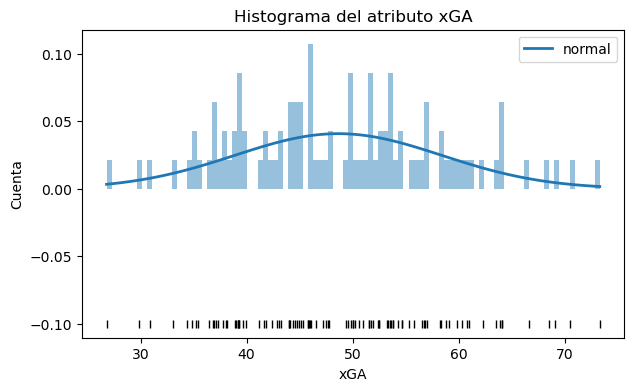

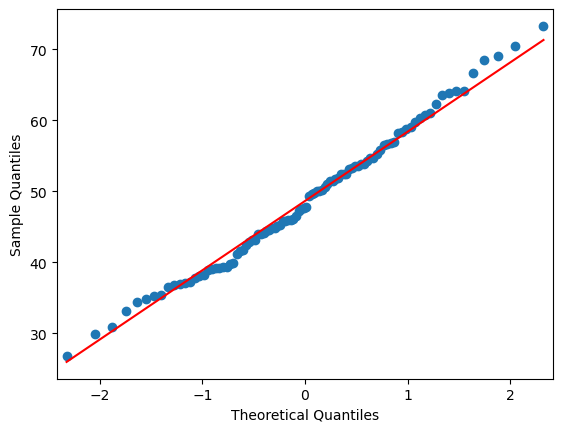

Resultado del Test de Hipótesis:

Shapiro-Wilk: 

t-statistic = 0.989
p-value = 0.610
No podemos rechazar Ho con un nivel de significancia del 5.0 %,
el atributo tiene una distribucción normal(Probably Gaussian).
---------- 

D'Agostino K^2 Normality: 

t-statistic = 1.721
p-value = 0.423
No podemos rechazar Ho con un nivel de significancia del 5.0 %,
el atributo tiene una distribucción normal(Probably Gaussian).
---------- 

Anderson-Darling: 

t-statistic = 0.306
No podemos rechazar Ho con un nivel de significancia del 15.0 %,
el atributo tiene una distribucción normal(Probably Gaussian).
No podemos rechazar Ho con un nivel de significancia del 10.0 %,
el atributo tiene una distribucción normal(Probably Gaussian).
No podemos rechazar Ho con un nivel de significancia del 5.0 %,
el atributo tiene una distribucción normal(Probably Gaussian).
No podemos rechazar Ho con un nivel de significancia del 2.5 %,
el atributo tiene una distribucción normal(Probably Gaussian).
No podemos rechazar 

In [5]:
# Cuerpo del ejercicio
print('---------- \n')
print(Fore.GREEN+f'Nombre de los atributos:')
display(data.columns)
print(Fore.RESET+'---------- \n')

# Nivel de Significancia
alfa=0.05

#-----------------------------------------------------
# Modificamos el atributo para realizar el estudio....
#------------------------------------------------------
 

fatributo='Attendance'
Satributo=data['Attendance']
fatributo='xGA'
Satributo=data['xGA']

print(Fore.GREEN+'Conjunto de Datos del atributo {atributo}:')
display(data[fatributo].unique())
print(Fore.RESET+'---------- \n')
#print(f'Conjunto de Datos del atributo Country:')
#display(data['Country'].unique())
titulo=f'Histograma del atributo {fatributo}'
Histo(data,titulo,fatributo,Satributo,alfa)

#Test de hipótesis
test_hipotesis(data[fatributo],alfa)

#Si realizamos un filtro al DataSet, a ver sí se acepta más Ho.
#dfagrupado=data[(data['Country']=="ENG")]
#dfagrupado=data.query('Country in ["ENG","ESP"]')
#display(dfagrupado[atributo].unique())
#test_hipotesis(dfagrupado[atributo],alfa)

### <font color='#d50283'>- Exercici 1</font>
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%

***
**Calcula el p-valor y di sí se rechaza la hipótesis nula tomando un alfa de 5%:**

In [6]:
print(f'La media de asistencia a los encuentros es {data.Attendance.mean():.3f}')

La media de asistencia a los encuentros es 24239.857


Hipótesis:
- $H_0: \mu_M = 24239$  La asistencia media a los encuentros es 24239.
- $H_1: \mu_M \neq 24239$ La asistencia media a los encuentros NO es 24239.

In [7]:
# Utilizamos One Sample T-test

ALPHA = 0.05

stat, p = ttest_1samp(data.Attendance, popmean=24239)

print(Style.BRIGHT +'Resultado del Test de Hipótesis:\n'+Style.RESET_ALL)

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {ALPHA*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).') if p > ALPHA else print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).')

Resultado del Test de Hipótesis:

t-statistic = 0.001
p-value = 1.000
No podemos rechazar Ho con un nivel de significancia del 5.0 %,
el atributo tiene una distribucción normal(Probably Gaussian).


### <font color='#d50283'>- Exercici 2</font>
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.


Hipotesis:
- $H_0: \mu_M = \mu_F$  La media de las muestras son iguales.
- $H_1: \mu_M \neq \mu_F$ La media de las muestras no son iguales.

In [8]:
#Pruebas
#Si realizamos un filtro al DataSet, a ver sí se acepta más Ho.
#fatributo='Pts'
#dfagrupado=data[(data['Country']=="ENG")]
#dfagrupado=data.query('LgRk==1')
#display(dfagrupado[fatributo].unique())


In [9]:
# Utilizamos para este Test, los atributos
# GF = Goles marcados.
# GA = Goles en contra.

ALPHA = 0.05

data1 = data['GF']
data2 = data['xG']
stat, p = ttest_ind(data1, data2, alternative='two-sided', equal_var=False)

print('t-statistic = %.3f\np-value = %.3f' % (stat,p))
print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).') if p > ALPHA else print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).')

t-statistic = 1.082
p-value = 0.281
No podemos rechazar Ho con un nivel de significancia del 5.0 %,
el atributo tiene una distribucción normal(Probably Gaussian).


In [10]:
#Pearson's Correlation test
# GF = Goles marcados.
# GA = Goles en contra.

ALPHA = 0.05

data1 = data['GF']
data2 = data['xG']
stat, p = pearsonr(data1, data2)

print('t-statistic = %.3f\np-value = %.3f' % (stat,p))
print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).') if p > ALPHA else print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).')

t-statistic = 0.919
p-value = 0.000
Podemos rechazar Ho con un nivel de significancia del 5.0 %,
el atributo no tiene una distribucción normal(Not Probably Gaussian).


> ****Nota: Utilizando otra función para el estudio, y seleccionando los mismos atributos el resultado puede variar.****


### <font color='#d50283'>- Exercici 3</font>
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Hipotesis:
- $H_0: \mu_B = \mu_V = \mu_W$  Las medias de los atributos **son iguales**
- $H_1$: Las tres medias **no son iguales**

In [11]:
# Utilizamos el test ANOVA para tres grupos


ALPHA = 0.05

data1 = data[['W']]
data2 = data[['GF']]
data3 = data[['xG']]
stat, p = f_oneway(data1, data2, data3)


print('t-statistic = %.3f\np-value = %.3f' % (stat,p))
print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).') if p > ALPHA else print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).')

t-statistic = 289.679
p-value = 0.000
Podemos rechazar Ho con un nivel de significancia del 5.0 %,
el atributo no tiene una distribucción normal(Not Probably Gaussian).


> ****Nota: El Test ANOVA nos dice que podemos afirmar que las medias no son iguales. Pero no nos permite decir si son iguales dos a dos. Para ello hemos de aplicar el test de TUKEY.****



### <font color='##08a22a'>*Cómo realizar la prueba de Tukey en Python*</font> [Link](<https://statologos.com/piton-de-prueba-de-tukey/>)



    valor name
0    28.0    W
1    26.0    W
2    26.0    W
3    24.0    W
4    25.0    W
..    ...  ...
93   41.3   xG
94   35.4   xG
95   37.8   xG
96   33.0   xG
97   30.7   xG

[294 rows x 2 columns]
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    GF      W -37.4286    0.0 -41.5386 -33.3186   True
    GF     xG  -2.2245 0.4104  -6.3345   1.8855  False
     W     xG  35.2041    0.0  31.0941  39.3141   True
------------------------------------------------------


<AxesSubplot: xlabel='valor', ylabel='Count'>

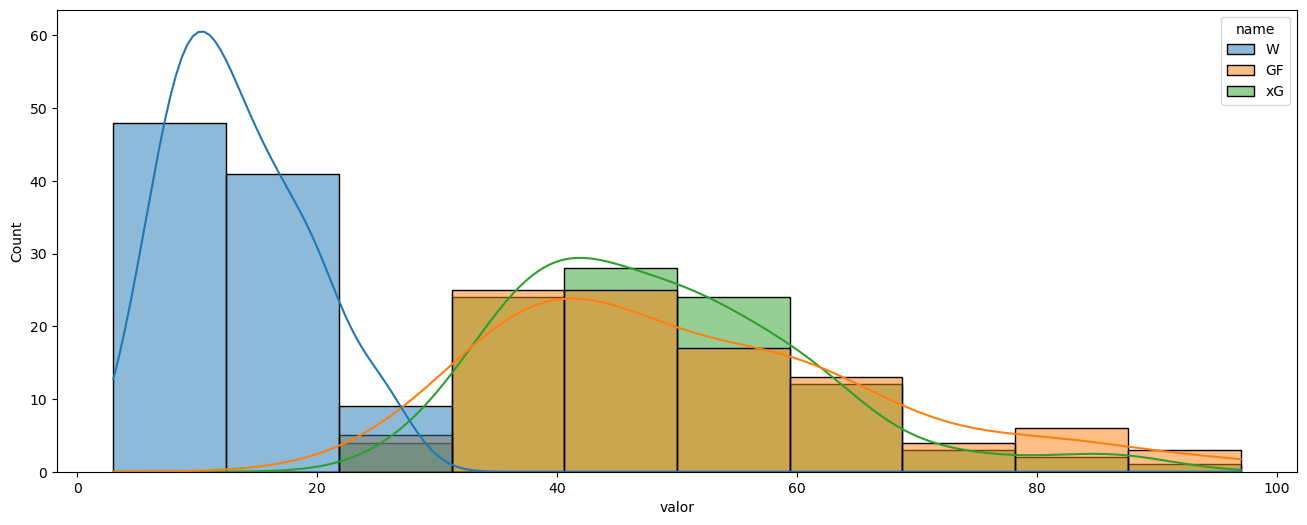

In [12]:
# Comparació de multiples grups per parells (Tukey HSD)
# creó una tabla con dos atributos, donde el atributo 'valor' contiene los datos y 'name' contiene el
# nombre del atributo origen
# no es muy estético, pero ? , se puede realizar con la función "melt de panda"
ALPHA = 0.05

def CrearTabla(df,atributo):
    tabla=df[[atributo]]
    tabla=tabla.rename(columns={atributo:'valor'})
    tabla=tabla.assign(name=atributo)
    return tabla

tabla1=CrearTabla(data,'W')
tabla2=CrearTabla(data,'GF')
tabla3=CrearTabla(data,'xG')


union=[tabla1,tabla2,tabla3]
result=pd.concat(union)

print(result)

m_comp = pairwise_tukeyhsd(endog=result['valor'], groups=result['name'], alpha=ALPHA)
print(m_comp)

plt.figure(figsize=(16, 6))
sns.histplot(data=result, x='valor', hue='name', kde=True)